# Part II - Loan Data from Prosper
## by Sara Osama Kilany


## Investigation Overview

The purpose of this study was to explore how the Loan original amount varies with different features. The main variables of interest were the borrower state, Income range, Is borrower homeowner, and loan status.



## Dataset Overview

The Loan Data from Prosper that we used after preprocessing has 94843 records and 17 columns. We focus on the Loan original amount and its interaction with the borrower state, Income range, Is borrower homeowner, and loan status.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('simple_data.csv')
df1=df[df['BorrowerState'].isin(list(df.BorrowerState.value_counts().index)[:10])]

In [3]:
# Define a list of income ranges in descending order
income_order = ['$100,000+', '$75,000-99,999','$50,000-74,999', '$25,000-49,999','$1-24,999']

# Get the first color from the seaborn color palette
base_color = sns.color_palette()[0]

# Get the top 5 states by borrower count in the 'BorrowerState' column of a pandas DataFrame called 'df'
state_order = df['BorrowerState'].value_counts().index[:5]

# Create a new DataFrame called 'df1' by selecting rows from 'df' where the 'BorrowerState' column matches a state in the 'state_order' list
df1=df[df['BorrowerState'].isin(list(df.BorrowerState.value_counts().index))]

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Number of Borrowers per State-Top 5

We found that the top 5 states in terms of number of borrowers were CA, NY, FL, TX, and IL. CA has almost twice or more number of borrowers than each of the other 4 states.

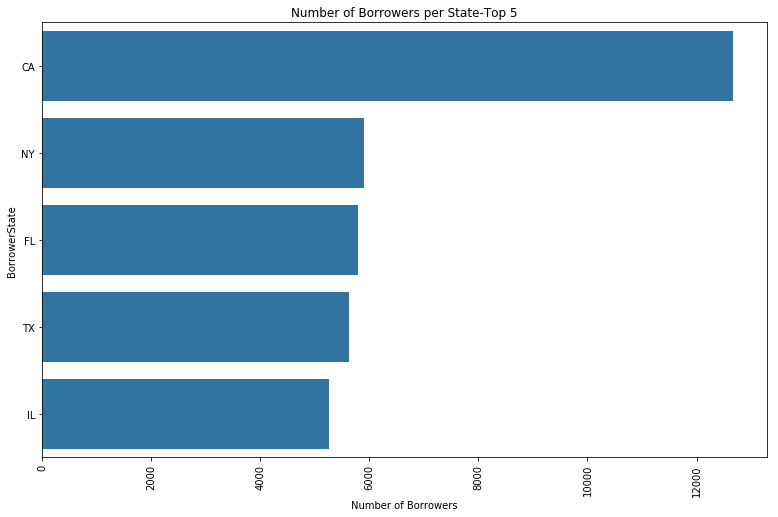

In [4]:
# Set the size of the matplotlib figure
plt.figure(figsize=(13,8))

# Create a countplot using seaborn, with data filtered to only include rows where 'BorrowerState' is in the 'state_order' list, and displaying the 'BorrowerState' column on the y-axis, colored with 'base_color', and ordered based on the order of the 'state_order' list.
sns.countplot(data=df[df['BorrowerState'].isin(state_order)], y='BorrowerState', color=base_color, order=state_order);

# Rotate the x-axis tick labels by 90 degrees
plt.xticks(rotation=90)

# Set the plot title
plt.title('Number of Borrowers per State-Top 5')

# Set the x-axis label
plt.xlabel('Number of Borrowers')

# Display the plot
plt.show()


## Loan Original Amount Summary Statistics for Top 5 States

The median for the top 5 states in terms of number of borrowers have close median values for the loan original amount. The highest median in in TX. The largest variability is in CA.


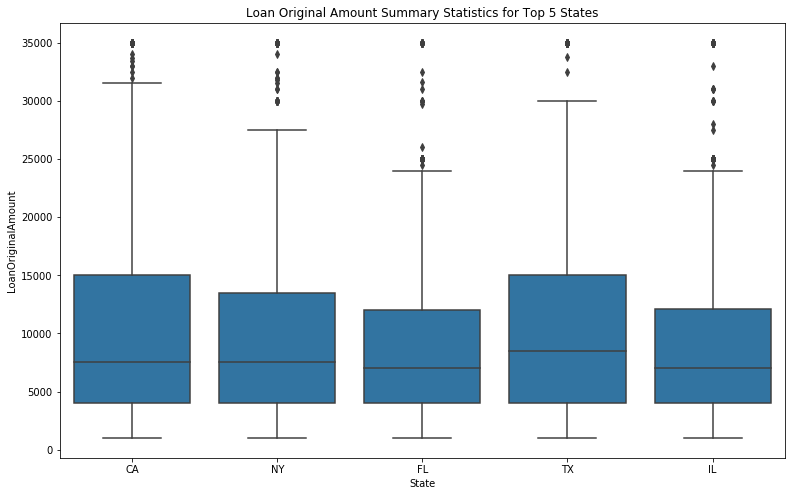

In [5]:
# Set the size of the matplotlib figure
plt.figure(figsize=(13,8))

# Create a boxplot using seaborn, with 'BorrowerState' displayed on the x-axis, 'LoanOriginalAmount' on the y-axis, and data filtered to only include rows where 'BorrowerState' is in the top 5 states by borrower count, colored with 'base_color', and ordered based on the order of the top 5 states by borrower count.
sns.boxplot(x='BorrowerState', y='LoanOriginalAmount', data=df1, color=base_color, order=df.BorrowerState.value_counts().index[:5])

# Set the plot title
plt.title('Loan Original Amount Summary Statistics for Top 5 States')

# Set the x-axis label
plt.xlabel('State')

# Display the plot
plt.show()


## Total Loan Original Amount per State- Top 5

CA has the largest sum of loan original amounts, almost twice those in NY and TX.


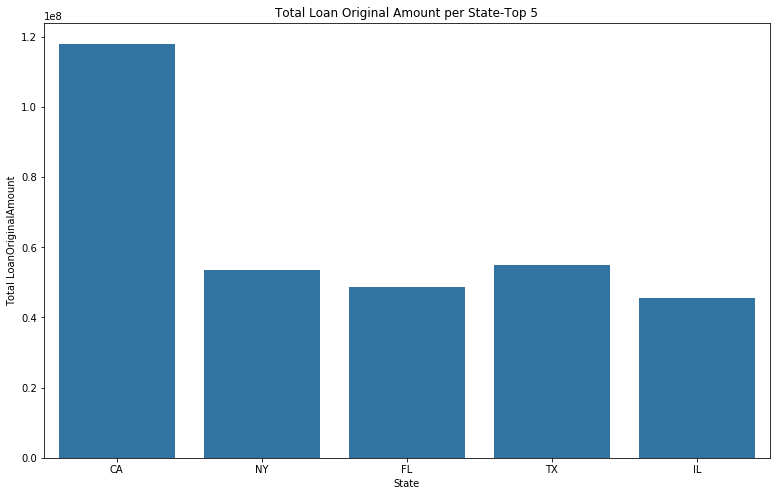

In [6]:
# Group the 'LoanOriginalAmount' column by 'BorrowerState' in the 'df1' DataFrame, summing the loan amounts for each state and resetting the index to create a new DataFrame called 'df2'.
df2 = df1.groupby('BorrowerState')['LoanOriginalAmount'].sum().reset_index()

# Set the size of the matplotlib figure
plt.figure(figsize=(13,8))

# Create a barplot using seaborn, with 'BorrowerState' displayed on the x-axis, 'LoanOriginalAmount' on the y-axis, and data from the 'df2' DataFrame, colored with 'base_color', and ordered based on the order of the top 5 states by borrower count.
sns.barplot(x='BorrowerState',y='LoanOriginalAmount', data=df2, color = base_color, order = df.BorrowerState.value_counts().index[:5])

# Set the plot title
plt.title('Total Loan Original Amount per State-Top 5')

# Set the x-axis label
plt.xlabel('State')

# Set the y-axis label
plt.ylabel('Total LoanOriginalAmount')

# Display the plot
plt.show()


## Total Loan Amount by Income Range and Borrower Homeowner Status

For income range 100k+, borrowers who are home owners had the largest total loan amount. Home owners with income range 24.999k formed the least loan amount.

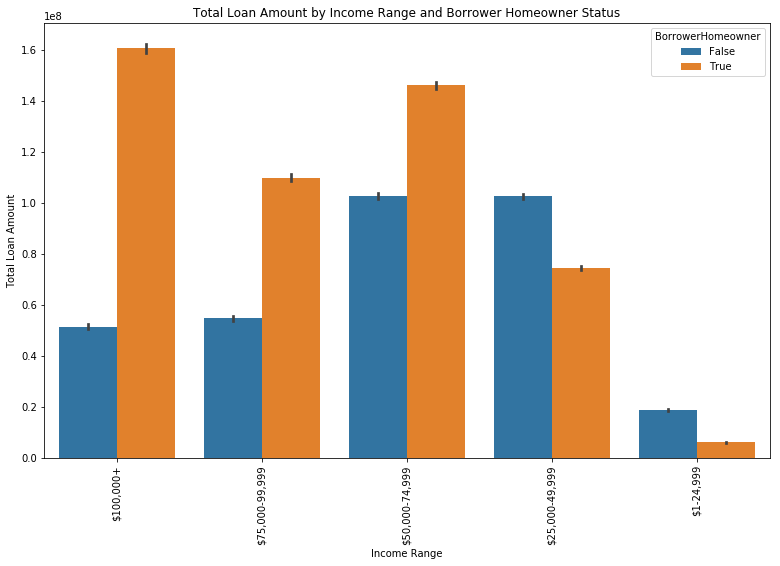

In [7]:
# Set the size of the matplotlib figure
plt.figure(figsize=(13,8))

# Create a barplot using seaborn, with 'IncomeRange' displayed on the x-axis, 'LoanOriginalAmount' on the y-axis, 'IsBorrowerHomeowner' used to determine the hue of the bars, data from the 'df1' DataFrame, the estimator set to np.sum to sum the loan amounts for each income range and borrower homeowner status combination, the x-axis ordered based on the order of the income ranges in 'income_order'.
sns.barplot(x='IncomeRange', y='LoanOriginalAmount', hue='IsBorrowerHomeowner', data=df1, estimator=np.sum, order= income_order)

# Set the plot title
plt.title('Total Loan Amount by Income Range and Borrower Homeowner Status')

# Set the x-axis label
plt.xlabel('Income Range')

# Set the y-axis label
plt.ylabel('Total Loan Amount')

# Add a legend to the plot, with the title 'BorrowerHomeowner' and a visible frame.
plt.legend(title='BorrowerHomeowner',frameon=True)

# Rotate the x-axis tick labels 90 degrees
plt.xticks(rotation=90)

# Display the plot
plt.show()

## Average Loan Amount by Income Range, Borrower Homeowner Status, and State (Top 5)

For the mean value of original loan amount, Home owners mean value is always larger than non home owners, across all incoome ranges, across the top 5 states(top 5 in number of borrowers). The mean is apprximately similar across all 5 states when comparing a certain income range, with the exception of CA state borrowers who own homes with income 24.999k or less, who have  the highest mean loan amount.



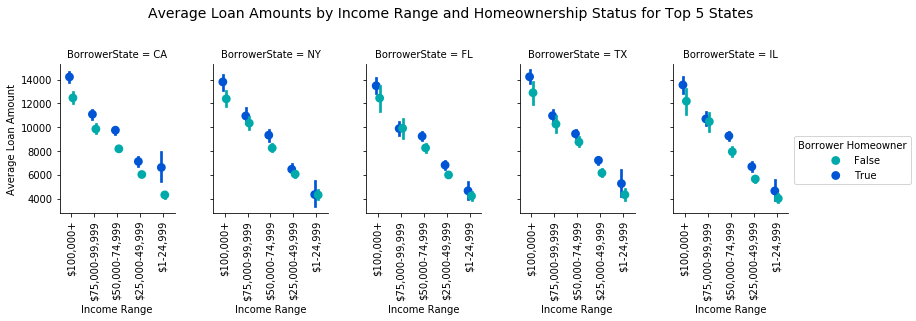

In [8]:

g = sns.FacetGrid(df1, col='BorrowerState',col_wrap=5, col_order=  df.BorrowerState.value_counts().index[:5],size=3, aspect=0.75);

# Map a barplot to the facet grid, using the 'IncomeRange' column as the x-axis, the 'LoanOriginalAmount' column as the y-axis, and the 'IsBorrowerHomeowner' column as the hue
g.map(sns.pointplot, 'IncomeRange', 'LoanOriginalAmount', 'IsBorrowerHomeowner', estimator=np.mean, order=income_order,hue_order=[True, False], palette = 'winter' ,linestyles = '',dodge=.15)

# Set the axis and title labels
g.set_axis_labels('Income Range', 'Average Loan Amount');
g.set_titles(row_template='{row_name}');

# Add a legend
g.add_legend(title='Borrower Homeowner');
g.set_xticklabels(rotation=90)
# Add the plot title
g.fig.suptitle('Average Loan Amounts by Income Range and Homeownership Status for Top 5 States', fontsize=14, y=1.15)

# Show the plot
plt.show();

## Average Loan Original Amount by Income Range and Loan Status

Completed loans have lower mean value for all in come ranges than those with Current status. The value of the mean is almost twice as much for the current for each income range.

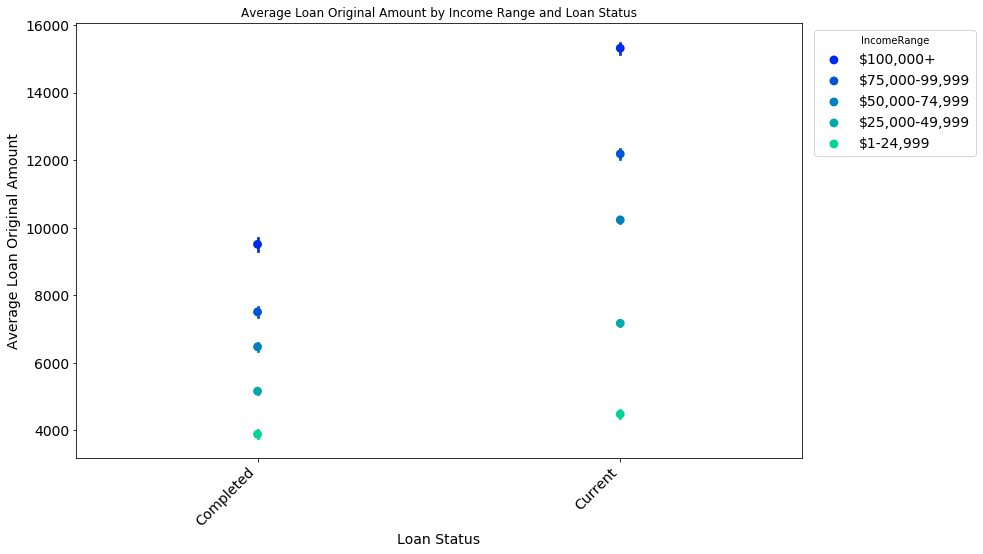

In [9]:
# Set the figure size
plt.figure(figsize=(13,8))

# Filter the data to only include loans that are 'Completed' or 'Current' and have an income range in the defined order
loan_data_compact = df[(df['LoanStatus'].isin(['Completed','Current']))
                               &(df['IncomeRange'].isin(income_order))]

# Create a pointplot with LoanStatus on the x-axis, LoanOriginalAmount on the y-axis, and IncomeRange as the hue
ax = sns.pointplot(x="LoanStatus", y="LoanOriginalAmount", hue="IncomeRange",hue_order=income_order, data=loan_data_compact,palette = 'winter',linestyles = '', dodge = 0,estimator=np.mean)

# Set the x and y labels for the plot
ax.set(xlabel='Loan Status', ylabel='Average Loan Original Amount')
ax.xaxis.get_label().set_fontsize(14)
ax.yaxis.get_label().set_fontsize(14)
plt.yticks(fontsize=14)
# Rotate the x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right',fontsize=14)

# Add a legend with the title 'IncomeRange' and place it outside the plot area to the top right
ax.legend(title='IncomeRange',bbox_to_anchor=(1.25,1), fontsize=14)

# Add the plot title
plt.title("Average Loan Original Amount by Income Range and Loan Status")
# Show the plot
plt.show()


### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [10]:
# Use this command if you are running this file in local
# !jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
